In [3]:
#import photos
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import skimage.io as io

In [4]:
src = 'Image/'
include = {'CatHead','ChickenHead', 'BearHead', 'ElephantHead', 
           'EagleHead', 'DeerHead', 'MonkeyHead', 'PandaHead'}
pklname='animals'

In [5]:
#resize_all(src, pklname, include, width=80, height=80)

In [6]:
import joblib
data = joblib.load('animals_80x80px.pkl')

In [7]:
np.unique(data['label'])

array(['Bear', 'Cat', 'Chicken', 'Deer', 'Eagle', 'Elephant', 'Monkey',
       'Panda'], dtype='<U8')

In [8]:
data['data'][6].shape

(80, 80, 3)

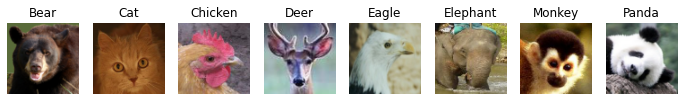

In [9]:
# 5 - Display one example of each animal fo the dataset
# Show several data for each label (== category) 

X = np.array(data['data'])
y = np.array(data['label'])

n_animals = np.unique(y)


fig, axs = plt.subplots(1,len(n_animals), figsize=(12, 12))
for i, d in enumerate(n_animals):
        a = X[y == d][10]
        axs[i].imshow(a)
        axs[i].set_title(d)
        axs[i].axis('off')
        
# Warning : if I put the dog, the code doesn't work anymore, I had to replace it with the cat. In the dog folder, there is an image
# which is already in the (80,80) format which is why the dog class can't be converted from (80,80,3) into (80,80)

In [10]:
# 6 - Divide your data with train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [11]:
# 7 - Verify the pictures distribution

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(699, 80, 80, 3)
(699,)
(175, 80, 80, 3)
(175,)


In [12]:
for animal in (n_animals):
  print('--',animal,'--')
  print(X[y == animal].shape[0],'full dataset')
  print(X_train[y_train == animal].shape[0],'train data')
  print(X_test[y_test == animal].shape[0],'test data')
  print('')

-- Bear --
101 full dataset
82 train data
19 test data

-- Cat --
159 full dataset
134 train data
25 test data

-- Chicken --
100 full dataset
81 train data
19 test data

-- Deer --
101 full dataset
74 train data
27 test data

-- Eagle --
97 full dataset
79 train data
18 test data

-- Elephant --
100 full dataset
77 train data
23 test data

-- Monkey --
100 full dataset
77 train data
23 test data

-- Panda --
116 full dataset
95 train data
21 test data



**8 - Data processing**

In [13]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
from skimage import exposure

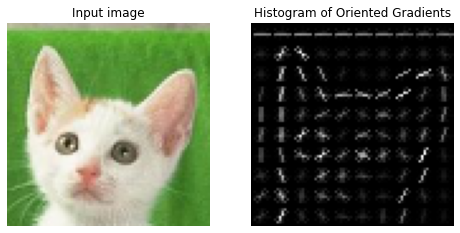

In [14]:
image=X[y == 'Cat'][5]
fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(1, 1), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
ax2.axis('off')
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()


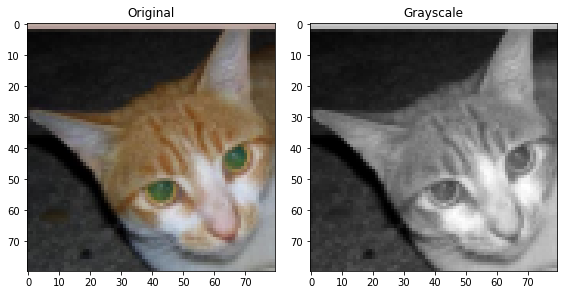

In [15]:
# from rgb to grayscale
from skimage.color import rgb2gray
original = X[y == 'Cat'][1]
grayscale = rgb2gray(original)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

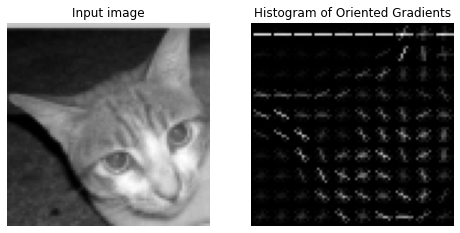

In [16]:
image=grayscale
fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(1, 1), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
ax2.axis('off')
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances

class RGB2GrayTransformer(BaseEstimator, TransformerMixin):

    """ An example transformer that returns the element-wise square root.
    For more information regarding how to build your own transformer, read more
    in the :ref:`User Guide <user_guide>`.
    Parameters
    ----------
    demo_param : str, default='demo'
        A parameter used for demonstation of how to pass and store paramters.
    Attributes
    ----------
    n_features_ : int
        The number of features of the data passed to :meth:`fit`.
    """
    def __init__(self, demo_param='demo'):
        self.demo_param = demo_param

    def fit(self, X, y=None):
        """A reference implementation of a fitting function for a transformer.
        Parameters
        ----------
        X : {array-like, sparse matrix}, shape (n_samples, n_features)
            The training input samples.
        y : None
            There is no need of a target in a transformer, yet the pipeline API
            requires this parameter.
        Returns
        -------
        self : object
            Returns self.
        """

        # Return the transformer
        return self

    def transform(self, X):
        """ A reference implementation of a transform function.
        Parameters
        ----------
        X : {array-like, sparse-matrix}, shape (n_samples, n_features)
            The input samples.
        Returns
        -------
        X_transformed : array, shape (n_samples, n_features)
            The array containing the element-wise square roots of the values
            in ``X``.
        """
        return rgb2gray(X)

In [18]:
rgbtogray=RGB2GrayTransformer()

In [19]:
rgbtogray.fit(X,y)

RGB2GrayTransformer()

In [20]:
image=rgbtogray.fit_transform(X)

In [21]:
image[0].shape

(80, 80)

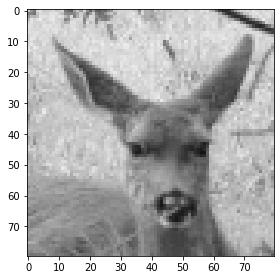

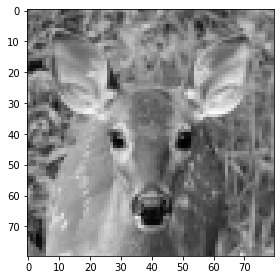

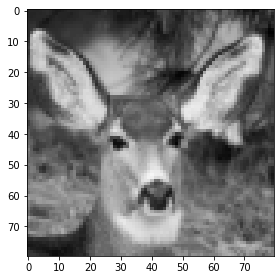

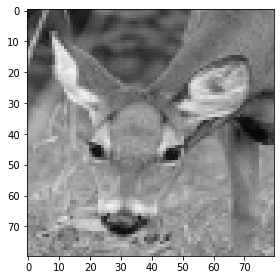

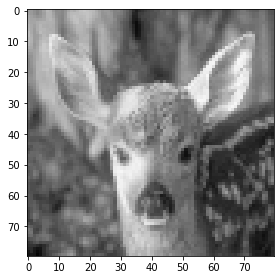

In [22]:
for i in range(5):
    io.imshow(image[i])
    io.show()

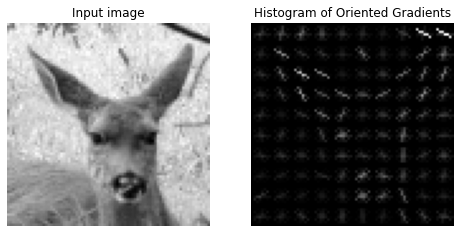

In [23]:

fd, hog_image = hog(image[0], orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(1, 1), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image[0], cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
ax2.axis('off')
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [24]:
hog_image_rescaled.shape

(80, 80)

In [25]:
class HOGTransformer(BaseEstimator, TransformerMixin):

    def __init__(self, demo_param='demo'):
        self.demo_param = demo_param

    def fit(self, X, y=None):
        # Return the transformer
        return self

    def transform(self, X):
        fd, hog_image = hog(X, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(1, 1), visualize=True)
        
        hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
        return hog_image_rescaled

In [26]:
nbtohog=HOGTransformer()

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [28]:
im_hog=nbtohog.fit_transform(image[0])
im_sc=sc.fit_transform(im_hog)

In [29]:
im_sc.shape

(80, 80)

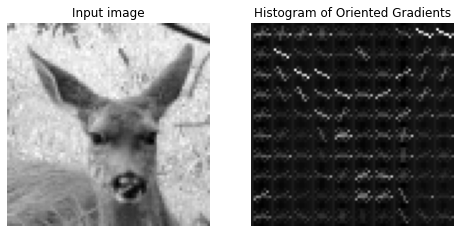

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image[0], cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display

ax2.axis('off')
ax2.imshow(im_sc,cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [31]:
X_train=rgbtogray.fit_transform(X_train)

In [32]:
X_train=nbtohog.fit_transform(X_train)

In [33]:
X_train.shape

(699, 80)

In [34]:
X_train=sc.fit_transform(X_train)

In [35]:
X_train.shape

(699, 80)

In [36]:
X_test=rgbtogray.fit_transform(X_test)

In [37]:
X_test=nbtohog.fit_transform(X_test)

In [38]:
X_test=sc.fit_transform(X_test)

In [39]:
X_test.shape

(175, 80)

In [40]:
# 9 - Train with Stochastic Gradient Descent
import numpy as np
from sklearn.linear_model import SGDClassifier


sgd = SGDClassifier(random_state=42)
model_sgd=sgd.fit(X_train, y_train)
y_pred_sgd=sgd.predict(X_test)


In [41]:
y_pred_sgd.shape

(175,)

In [44]:
# 10 - Evaluate false positives
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_sgd)

array([[ 0,  5,  0,  0,  1,  0, 13,  0],
       [ 0,  3,  3,  1,  3,  1, 12,  2],
       [ 0,  5,  3,  2,  2,  1,  6,  0],
       [ 0,  0,  3,  0,  3,  1, 18,  2],
       [ 0,  1,  4,  0,  1,  1, 10,  1],
       [ 0,  2,  1,  0,  1,  1, 17,  1],
       [ 1,  2,  4,  0,  1,  1, 13,  1],
       [ 1,  2,  2,  0,  3,  0, 12,  1]])

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_sgd))

              precision    recall  f1-score   support

        Bear       0.00      0.00      0.00        19
         Cat       0.15      0.12      0.13        25
     Chicken       0.15      0.16      0.15        19
        Deer       0.00      0.00      0.00        27
       Eagle       0.07      0.06      0.06        18
    Elephant       0.17      0.04      0.07        23
      Monkey       0.13      0.57      0.21        23
       Panda       0.12      0.05      0.07        21

    accuracy                           0.13       175
   macro avg       0.10      0.12      0.09       175
weighted avg       0.10      0.13      0.09       175



In [46]:
y[0]

'Deer'

In [47]:
sgd.predict([X_test[0]])

array(['Monkey'], dtype='<U8')

In [48]:
# 11 - Creating a pipeline
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

from sklearn.pipeline import Pipeline
pipe_hog = Pipeline([
    ('rgbtogray', RGB2GrayTransformer()),
    ('graytohog', HOGTransformer()),
    ('scaler',StandardScaler())
])

In [49]:
pipe_hog.get_params()

{'memory': None,
 'steps': [('rgbtogray', RGB2GrayTransformer()),
  ('graytohog', HOGTransformer()),
  ('scaler', StandardScaler())],
 'verbose': False,
 'rgbtogray': RGB2GrayTransformer(),
 'graytohog': HOGTransformer(),
 'scaler': StandardScaler(),
 'rgbtogray__demo_param': 'demo',
 'graytohog__demo_param': 'demo',
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True}

In [50]:
# Example for the first dataset
image1=pipe_hog.fit_transform(X_train[0])

In [51]:
y_train[0]

'Chicken'

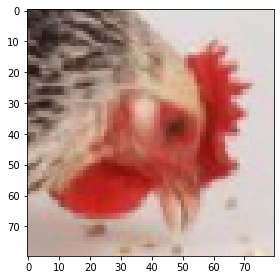

In [52]:
io.imshow(X_train[0])

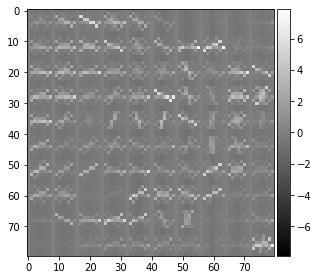

In [55]:
io.imshow(image1,cmap=plt.cm.gray)

In [56]:
from sklearn.svm import SVC
pipe1 = Pipeline([
    ('rgbtogray', RGB2GrayTransformer()),
    ('graytohog', HOGTransformer()),
    ('scaler',StandardScaler()),
    ('svc',SVC())
])

In [57]:
pipe1.fit(X_train,y_train)

Pipeline(steps=[('rgbtogray', RGB2GrayTransformer()),
                ('graytohog', HOGTransformer()), ('scaler', StandardScaler()),
                ('svc', SVC())])

In [58]:
pipe1.predict(X_test)

array(['Cat', 'Cat', 'Cat', 'Cat', 'Panda', 'Cat', 'Cat', 'Cat', 'Cat',
       'Cat', 'Cat', 'Cat', 'Panda', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat',
       'Cat', 'Cat', 'Panda', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat',
       'Cat', 'Panda', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat',
       'Panda', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Panda',
       'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Panda', 'Cat',
       'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Panda', 'Cat', 'Cat',
       'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Panda', 'Cat', 'Cat', 'Cat',
       'Cat', 'Cat', 'Cat', 'Cat', 'Panda', 'Cat', 'Cat', 'Cat', 'Cat',
       'Cat', 'Cat', 'Cat', 'Panda', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat',
       'Cat', 'Cat', 'Panda', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat',
       'Cat', 'Panda', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat',
       'Panda', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Panda',
       'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Pan

In [59]:
pipe2 = Pipeline([
    ('rgbtogray', RGB2GrayTransformer()),
    ('graytohog', HOGTransformer()),
    ('scaler',StandardScaler()),
    ('sgd',SGDClassifier(random_state=42))
])

In [60]:
pipe2.fit(X_train,y_train)

Pipeline(steps=[('rgbtogray', RGB2GrayTransformer()),
                ('graytohog', HOGTransformer()), ('scaler', StandardScaler()),
                ('sgd', SGDClassifier(random_state=42))])

In [61]:
pipe2.predict(X_test)

array(['Monkey', 'Monkey', 'Monkey', 'Eagle', 'Cat', 'Eagle', 'Monkey',
       'Monkey', 'Monkey', 'Monkey', 'Chicken', 'Cat', 'Elephant',
       'Eagle', 'Monkey', 'Monkey', 'Monkey', 'Monkey', 'Cat', 'Panda',
       'Chicken', 'Deer', 'Cat', 'Monkey', 'Monkey', 'Monkey', 'Monkey',
       'Eagle', 'Chicken', 'Monkey', 'Monkey', 'Monkey', 'Monkey',
       'Monkey', 'Chicken', 'Eagle', 'Chicken', 'Eagle', 'Monkey',
       'Monkey', 'Monkey', 'Cat', 'Cat', 'Panda', 'Elephant', 'Monkey',
       'Monkey', 'Monkey', 'Monkey', 'Cat', 'Cat', 'Panda', 'Chicken',
       'Monkey', 'Monkey', 'Monkey', 'Monkey', 'Monkey', 'Monkey',
       'Panda', 'Chicken', 'Monkey', 'Monkey', 'Monkey', 'Monkey',
       'Monkey', 'Eagle', 'Panda', 'Elephant', 'Eagle', 'Monkey',
       'Monkey', 'Monkey', 'Monkey', 'Monkey', 'Eagle', 'Chicken', 'Cat',
       'Panda', 'Monkey', 'Monkey', 'Cat', 'Chicken', 'Eagle', 'Elephant',
       'Eagle', 'Cat', 'Monkey', 'Monkey', 'Monkey', 'Cat', 'Deer',
       'Bear', 'Cat', 

In [62]:
# 12 - Defining a parameter grid
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8],
    'criterion' :['gini', 'entropy']
}

In [63]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
classifiers_list=[SGDClassifier, SVC, GaussianNB]
for estimator in classifiers_list:
    print(estimator)
    display(estimator().get_params())

<class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>


{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

<class 'sklearn.svm._classes.SVC'>


{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

<class 'sklearn.naive_bayes.GaussianNB'>


{'priors': None, 'var_smoothing': 1e-09}

In [64]:
from operator import itemgetter
from sklearn.model_selection import GridSearchCV
import operator
from pipelinehelper import PipelineHelper

pipe_gen = Pipeline([
    ('pipe_hog', pipe_hog),
    ('clf', PipelineHelper([
      ('sgd', SGDClassifier(random_state=42)),        
      ('svm', SVC()),
      ('gnb', GaussianNB()),

    ])),
])

params = {
    'clf__selected_model': pipe_gen.named_steps['clf'].generate({
        'sgd__alpha': [0.001, 0.01],
        'sgd__epsilon': [0.1, 0.01],
        'svm__C': [1.0, 2.0],
        'svm__kernel': ['linear', 'rbf'],
        'gnb__var_smoothing':[1e-08,1e-07]

    }),
}
grid = GridSearchCV(pipe_gen, params, scoring='accuracy')

In [65]:
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

{'clf__selected_model': ('svm', {'C': 1.0, 'kernel': 'rbf'})}
0.19885919835560123


In [66]:
import pandas as pd
scores_df = pd.DataFrame(grid.cv_results_)

In [67]:
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__selected_model,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.679281,0.030976,0.137535,0.008636,"(sgd, {'alpha': 0.001, 'epsilon': 0.1})","{'clf__selected_model': ('sgd', {'alpha': 0.00...",0.164286,0.107143,0.157143,0.150000,0.129496,0.141614,0.020787,5
1,0.633606,0.031773,0.124597,0.009910,"(sgd, {'alpha': 0.001, 'epsilon': 0.01})","{'clf__selected_model': ('sgd', {'alpha': 0.00...",0.164286,0.107143,0.157143,0.150000,0.129496,0.141614,0.020787,5
2,0.624938,0.043536,0.115808,0.003761,"(sgd, {'alpha': 0.01, 'epsilon': 0.1})","{'clf__selected_model': ('sgd', {'alpha': 0.01...",0.114286,0.135714,0.142857,0.100000,0.136691,0.125910,0.016162,7
3,0.701286,0.057732,0.142967,0.020815,"(sgd, {'alpha': 0.01, 'epsilon': 0.01})","{'clf__selected_model': ('sgd', {'alpha': 0.01...",0.114286,0.135714,0.142857,0.100000,0.136691,0.125910,0.016162,7
4,0.616135,0.032577,0.117232,0.000721,"(svm, {'C': 1.0, 'kernel': 'linear'})","{'clf__selected_model': ('svm', {'C': 1.0, 'ke...",0.157143,0.185714,0.150000,0.185714,0.179856,0.171686,0.015114,3
5,0.604852,0.019295,0.126596,0.013658,"(svm, {'C': 1.0, 'kernel': 'rbf'})","{'clf__selected_model': ('svm', {'C': 1.0, 'ke...",0.192857,0.207143,0.200000,0.192857,0.201439,0.198859,0.005452,1
6,0.623809,0.031066,0.118337,0.002167,"(svm, {'C': 2.0, 'kernel': 'linear'})","{'clf__selected_model': ('svm', {'C': 2.0, 'ke...",0.164286,0.164286,0.157143,0.207143,0.165468,0.171665,0.017983,4
7,0.600531,0.023513,0.120024,0.002235,"(svm, {'C': 2.0, 'kernel': 'rbf'})","{'clf__selected_model': ('svm', {'C': 2.0, 'ke...",0.192857,0.207143,0.192857,0.178571,0.187050,0.191696,0.009329,2
8,0.526792,0.002121,0.111398,0.000501,"(gnb, {'var_smoothing': 1e-08})","{'clf__selected_model': ('gnb', {'var_smoothin...",0.107143,0.092857,0.107143,0.121429,0.115108,0.108736,0.009580,9
9,0.606367,0.029492,0.125475,0.006933,"(gnb, {'var_smoothing': 1e-07})","{'clf__selected_model': ('gnb', {'var_smoothin...",0.107143,0.092857,0.107143,0.121429,0.115108,0.108736,0.009580,9


In [68]:
# 16 - With my own dataset

In [69]:
src1 = 'GoogleAnimals/'
include1 = {'Cat','Chicken', 'Bear', 'Elephant', 
           'Eagle', 'Deer', 'Monkey', 'Panda'}
pklname1='gganimals'

In [70]:
#resize_all(src1, pklname1, include1, width=80, height=80)

In [71]:
data1 = joblib.load('gganimals_80x80px.pkl')

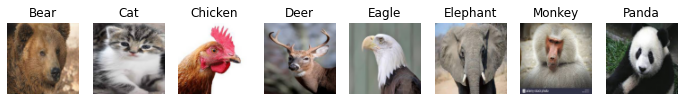

In [72]:
# Display one example of each animal fo the dataset
# Show several data for each label (== category) 

X1 = np.array(data1['data'])
y1 = np.array(data1['label'])

n_animals = np.unique(y1)


fig, axs = plt.subplots(1,len(n_animals), figsize=(12, 12))
for i, d in enumerate(n_animals):
        a = X1[y1 == d][1]
        axs[i].imshow(a)
        axs[i].set_title(d)
        axs[i].axis('off')

In [73]:
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42)


In [74]:
grid.fit(X1_train, y1_train)
print(grid.best_params_)
print(grid.best_score_)

/home/caroline09/anaconda3/envs/machlearn/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


{'clf__selected_model': ('sgd', {'alpha': 0.01, 'epsilon': 0.1})}
0.1571428571428571
